Goal
Using the data collected from existing customers, build a model that will help the marketing
team identify potential customers who are relatively more likely to subscribe term deposit
and thus increase their hit ratio.
Resources Available
The historical data for this project is available in file

Deliverable – 1 (Exploratory data quality report reflecting the following) – (20)
1. Univariate analysis (12 marks)
a. Univariate analysis – data types and description of the independent attributes
which should include (name, meaning, range of values observed, central values
(mean and median), standard deviation and quartiles, analysis of the body of
distributions / tails, missing values, outliers.
b. Strategies to address the different data challenges such as data pollution, outlier’s
treatment and missing values treatment.
c. Please provide comments in jupyter notebook regarding the steps you take and
insights drawn from the plots.
2. Multivariate analysis (8 marks)
a. Bi-variate analysis between the predictor variables and target column. Comment
on your findings in terms of their relationship and degree of relation if any.
Visualize the analysis using boxplots and pair plots, histograms or density curves.
Select the most appropriate attributes.
b. Please provide comments in jupyter notebook regarding the steps you take and
insights drawn from the plots
Deliverable – 2 (Prepare the data for analytics) – (10)
1. Ensure the attribute types are correct. If not, take appropriate actions.
2. Get the data model ready.
3. Transform the data i.e. scale / normalize if required
4. Create the training set and test set in ratio of 70:30
Deliverable – 3 (create the ensemble model) – (30)
1. First create models using Logistic Regression and Decision Tree algorithm. Note the
model performance by using different matrices. Use confusion matrix to evaluate
class level metrics i.e. Precision/Recall. Also reflect the accuracy and F1 score of the
model. (10 marks)
2. Build the ensemble models (Bagging and Boosting) and note the model performance
by using different matrices. Use same metrics as in above model. (at least 3
algorithms) (15 marks)

3. Make a DataFrame to compare models and their metrics. Give conclusion regarding
the best algorithm and your reason behind it. (5 marks)


Attribute information
Input variables:
Bank client data:
1. age: Continuous feature
2. job: Type of job (management, technician, entrepreneur, blue-collar, etc.)
3. marital: marital status (married, single, divorced)
4. education: education level (primary, secondary, tertiary)
5. default: has credit in default?
6. housing: has housing loan?
7. loan: has personal loan?
8. balance in account
Related to previous contact:
9. contact: contact communication type
10. month: last contact month of year
11. day: last contact day of the month
12. duration: last contact duration, in seconds*
Other attributes:
13. campaign: number of contacts performed during this campaign and for this
client
14. pdays: number of days that passed by after the client was last contacted from a
previous campaign (-1 tells us the person has not been contacted or contact
period is beyond 900 days)
15. previous: number of contacts performed before this campaign and for this
client
16. poutcome: outcome of the previous marketing campaign
Output variable (desired target):
17. Target: Tell us has the client subscribed a term deposit. (Yes, No)

In [1]:
#Import Libraries

%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix
%matplotlib inline
import random
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

#from yellowbrick.classifier import ClassificationReport, ROCAUC
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....

In [2]:
# read dataset/csv file
df = pd.read_csv('bank-full.csv')

In [3]:
# Take a look at first 10 rows of data
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


### Univariate analysis (12 marks) a. Univariate analysis – data types and description of the independent attributes which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers. b. Strategies to address the different data challenges such as data pollution, outlier’s treatment and missing values treatment. c. Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plots.

In [4]:
# Get info, datatype for the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
# Check number of rows and columns in the dataset
df.shape

(45211, 17)

In [6]:
# Check for NULL values in the file
df.isnull().sum()  

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [7]:
# 5 point summary of numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


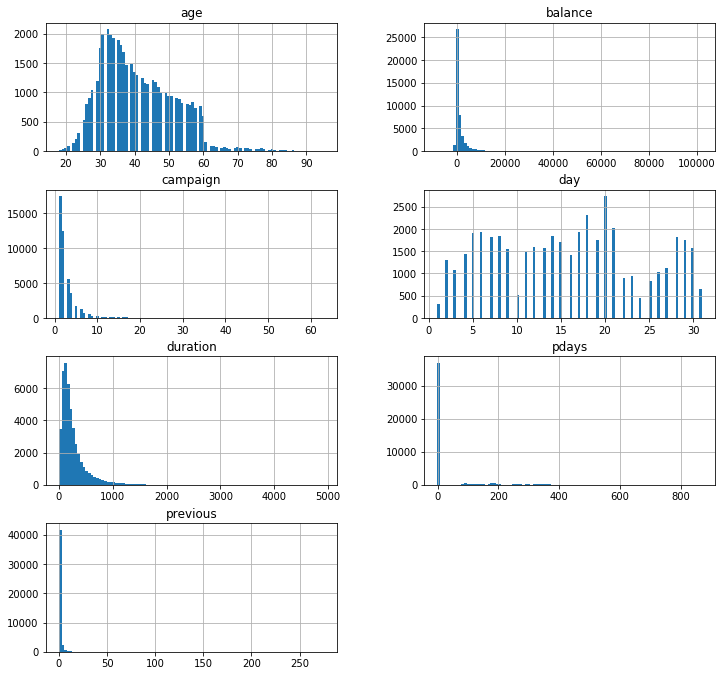

In [8]:
# Univariat Analysis for continuous variables
columns = list(df)[0:] 
df[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(10,2)); 

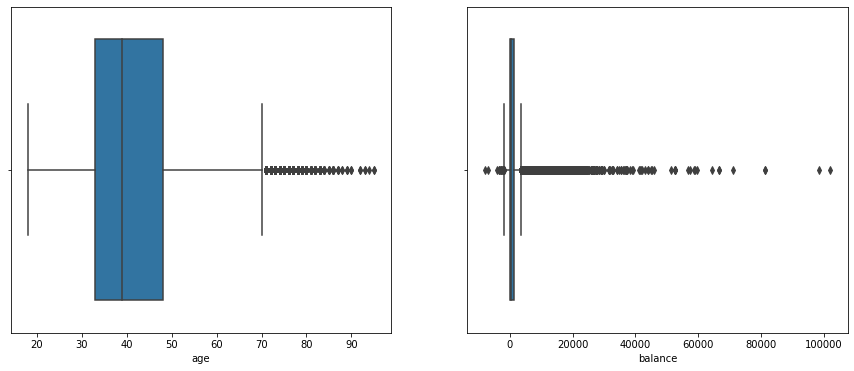

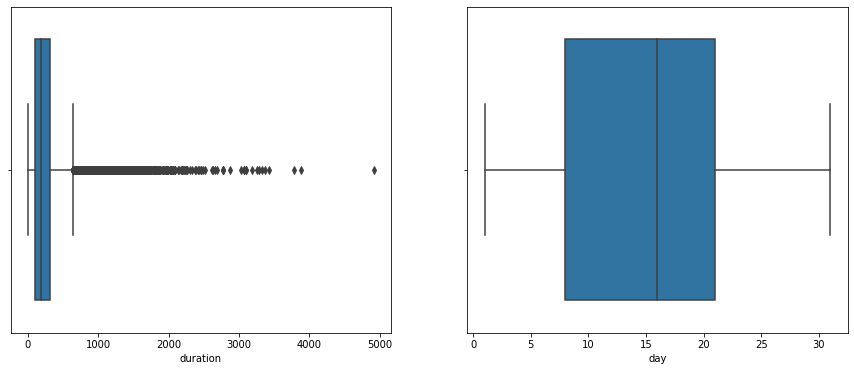

In [9]:
fig, (a,b,)= plt.subplots(1,2,figsize=(15,6))
sns.boxplot(df['age'],ax=a)
sns.boxplot(df['balance'],ax=b)

fig, (a,b,)= plt.subplots(1,2,figsize=(15,6))
sns.boxplot(df['duration'],ax=a)
sns.boxplot(df['day'],ax=b)

plt.show()

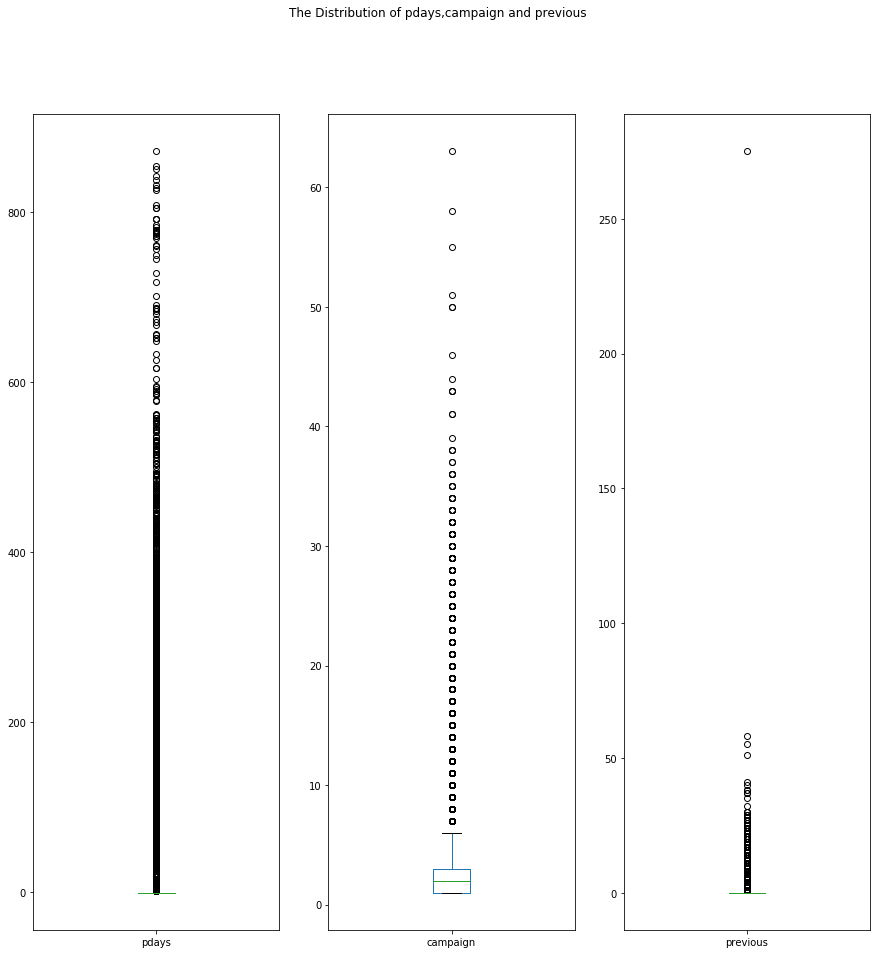

In [10]:
# Check Outliers
dist_dur_cam = df[['pdays','campaign','previous']].plot(kind = 'box', 
                                                      figsize = (15,15),
                                                      subplots = True, layout = (1,3),
                                                      sharex = False, sharey = False,
                                                      title='The Distribution of pdays,campaign and previous')


### pdays,campaign,previous,duration has outliers

In [11]:
# Checking skewness for these variables
df.skew()

age          0.684818
balance      8.360308
day          0.093079
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Text(0, 0.5, 'Count')

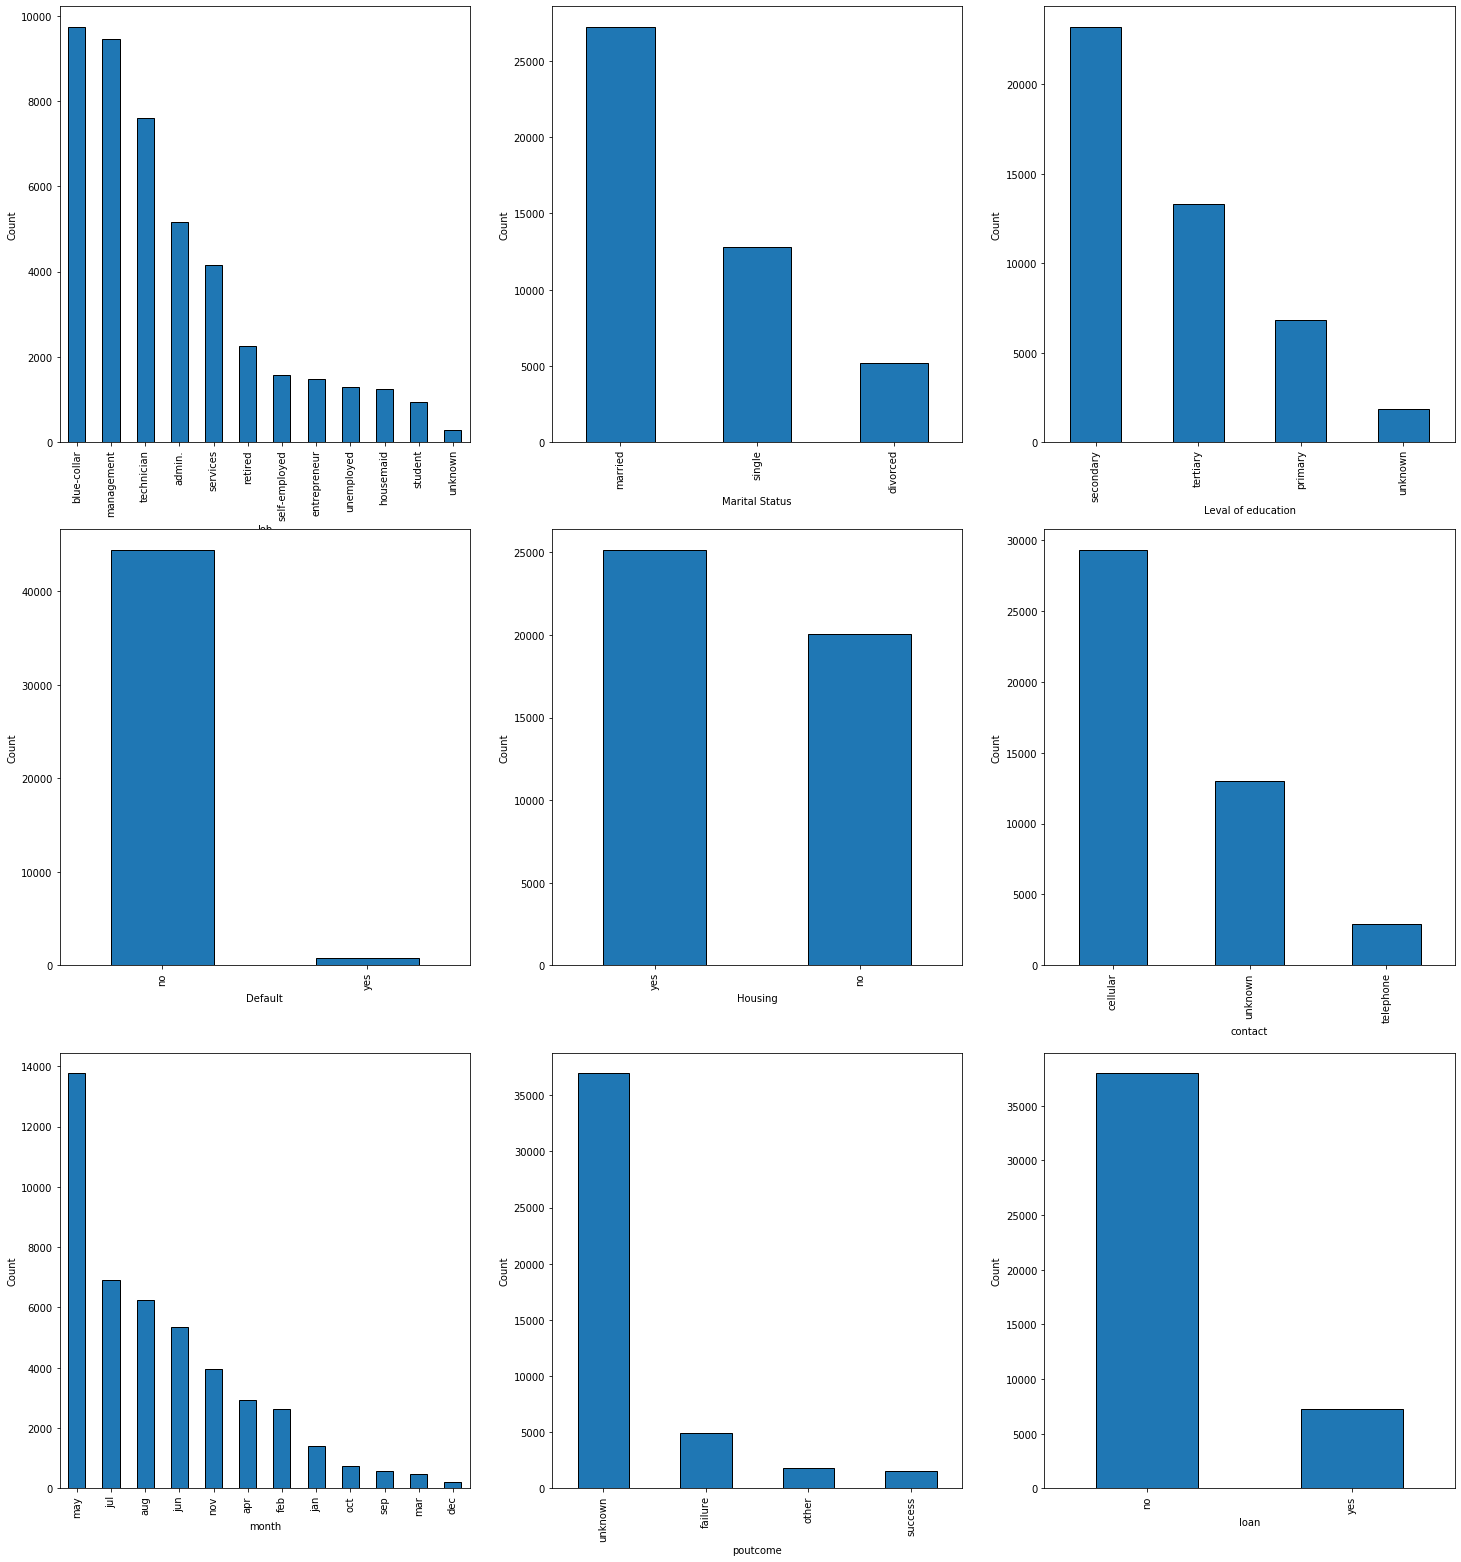

In [13]:
# categorical variables
plt.figure(figsize=(25,85))

plt.subplot(9,3,1)
df['job'].value_counts().plot(kind="bar", align='center',edgecolor = 'black')
plt.xlabel('Job')
plt.ylabel("Count")

plt.subplot(9,3,2)
df['marital'].value_counts().plot(kind="bar", align='center',edgecolor = 'black')
plt.xlabel('Marital Status')
plt.ylabel('Count')

plt.subplot(9,3,3)
df['education'].value_counts().plot(kind="bar", align='center',edgecolor = 'black')
plt.xlabel('Leval of education')
plt.ylabel('Count')

plt.subplot(9,3,4)
df['default'].value_counts().plot(kind="bar", align='center',edgecolor = 'black')
plt.xlabel('Default')
plt.ylabel('Count')

plt.subplot(9,3,5)
df['housing'].value_counts().plot(kind="bar", align='center',edgecolor = 'black')
plt.xlabel('Housing')
plt.ylabel('Count')

plt.subplot(9,3,6)
df['contact'].value_counts().plot(kind="bar", align='center',edgecolor = 'black')
plt.xlabel('contact')
plt.ylabel('Count')

plt.subplot(9,3,7)
df['month'].value_counts().plot(kind="bar", align='center',edgecolor = 'black')
plt.xlabel('month')
plt.ylabel('Count')

plt.subplot(9,3,8)
df['poutcome'].value_counts().plot(kind="bar", align='center',edgecolor = 'black')
plt.xlabel('poutcome')
plt.ylabel('Count')

plt.subplot(9,3,9)
df['loan'].value_counts().plot(kind="bar", align='center',edgecolor = 'black')
plt.xlabel('loan')
plt.ylabel('Count')


no     39922
yes     5289
Name: Target, dtype: int64


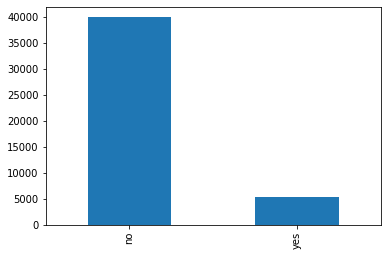

In [14]:
pd.value_counts(df["Target"]).plot(kind="bar");
Val = pd.value_counts(df["Target"])
print(Val)

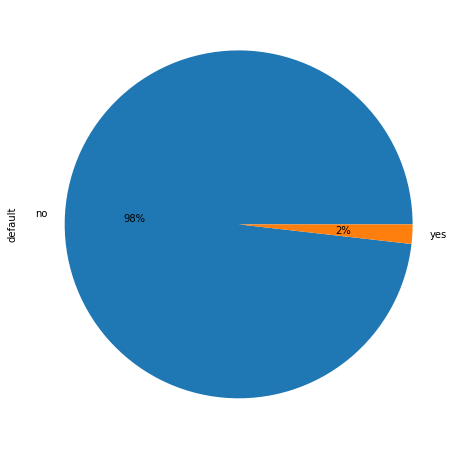

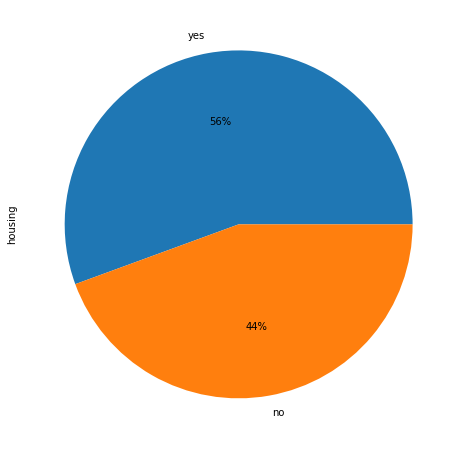

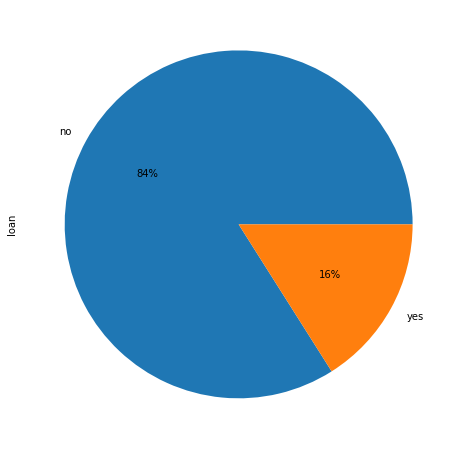

In [15]:
# plots for Loans (default,Housing Loan, Personal Loan)
plt.figure(figsize=(8,8))
df['default'].value_counts().plot(kind='pie',autopct='%1.0f%%')

plt.figure(figsize=(8,8))
df['housing'].value_counts().plot(kind='pie',autopct='%1.0f%%')

plt.figure(figsize=(8,8))
df['loan'].value_counts().plot(kind='pie',autopct='%1.0f%%')

plt.show()

#### About 2% Credit is defaulted,about 44% has housing loan and about 16% has personal loan as well

### Multivariate analysis (8 marks) a. Bi-variate analysis between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and pair plots, histograms or density curves. Select the most appropriate attributes. b. Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plots Deliverable – 2 (Prepare the data for analytics) – (10)

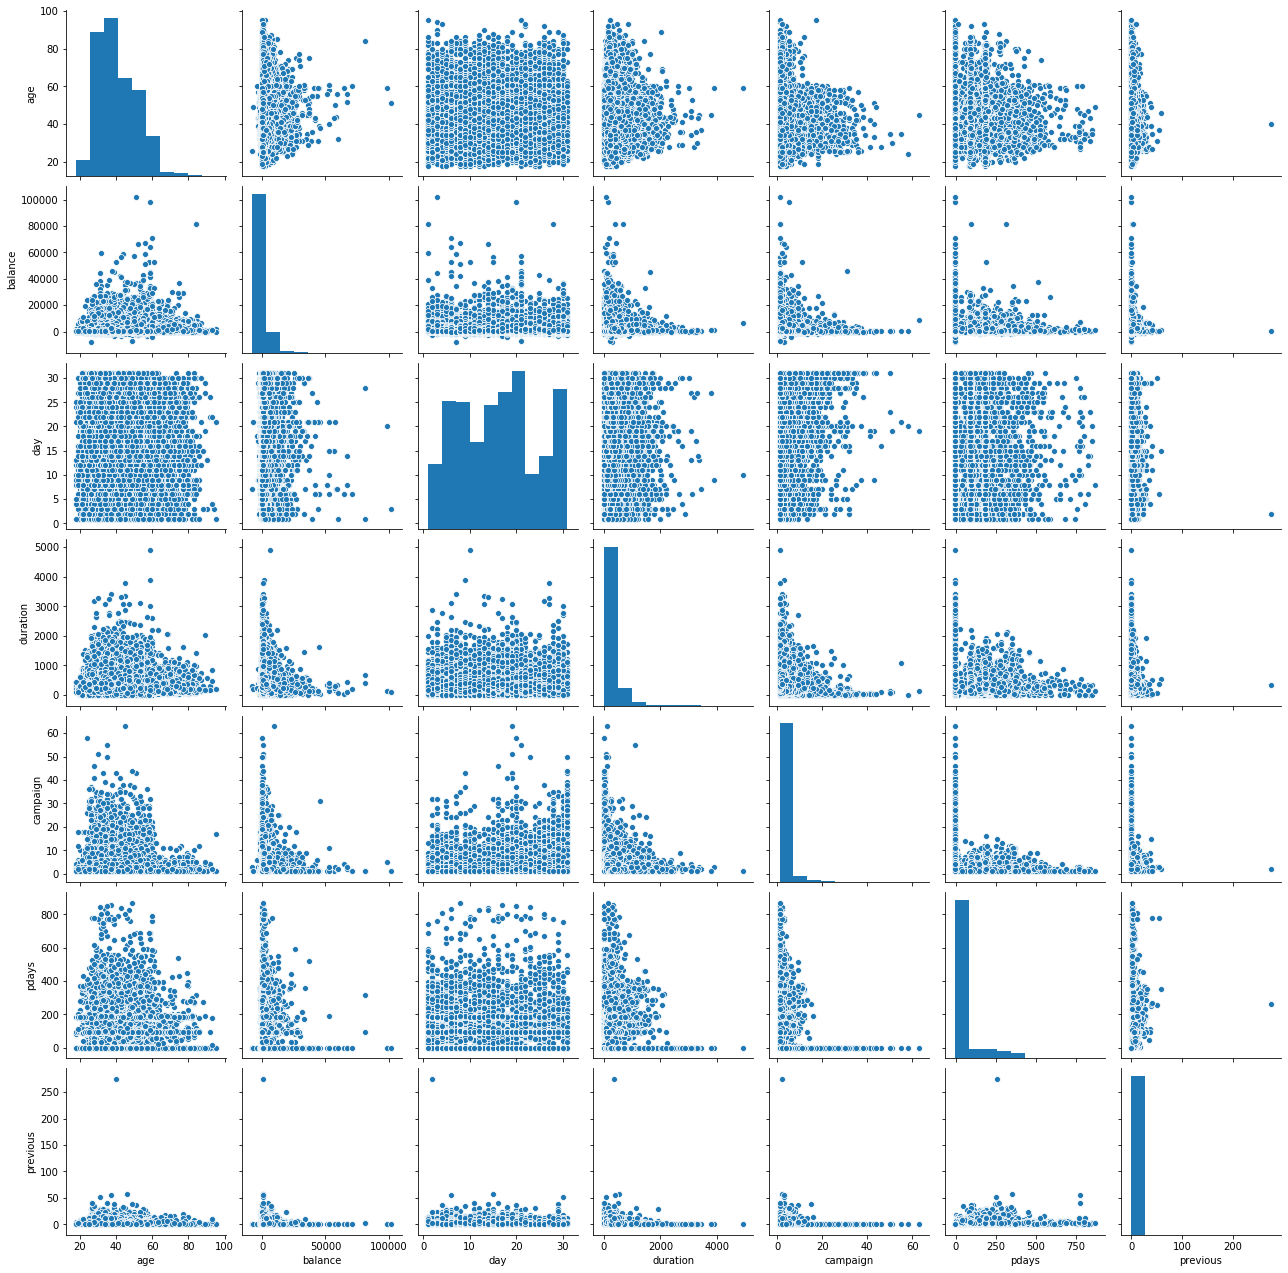

In [16]:
# Multivariate Analysis
sns.pairplot(df.iloc[:,:]);

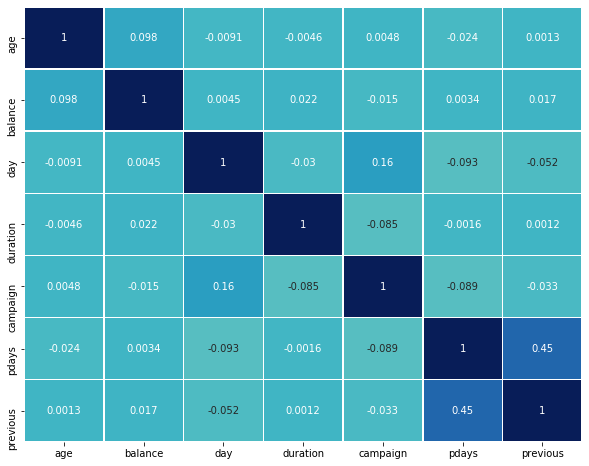

In [17]:
# Co-relation among the numerical variables
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

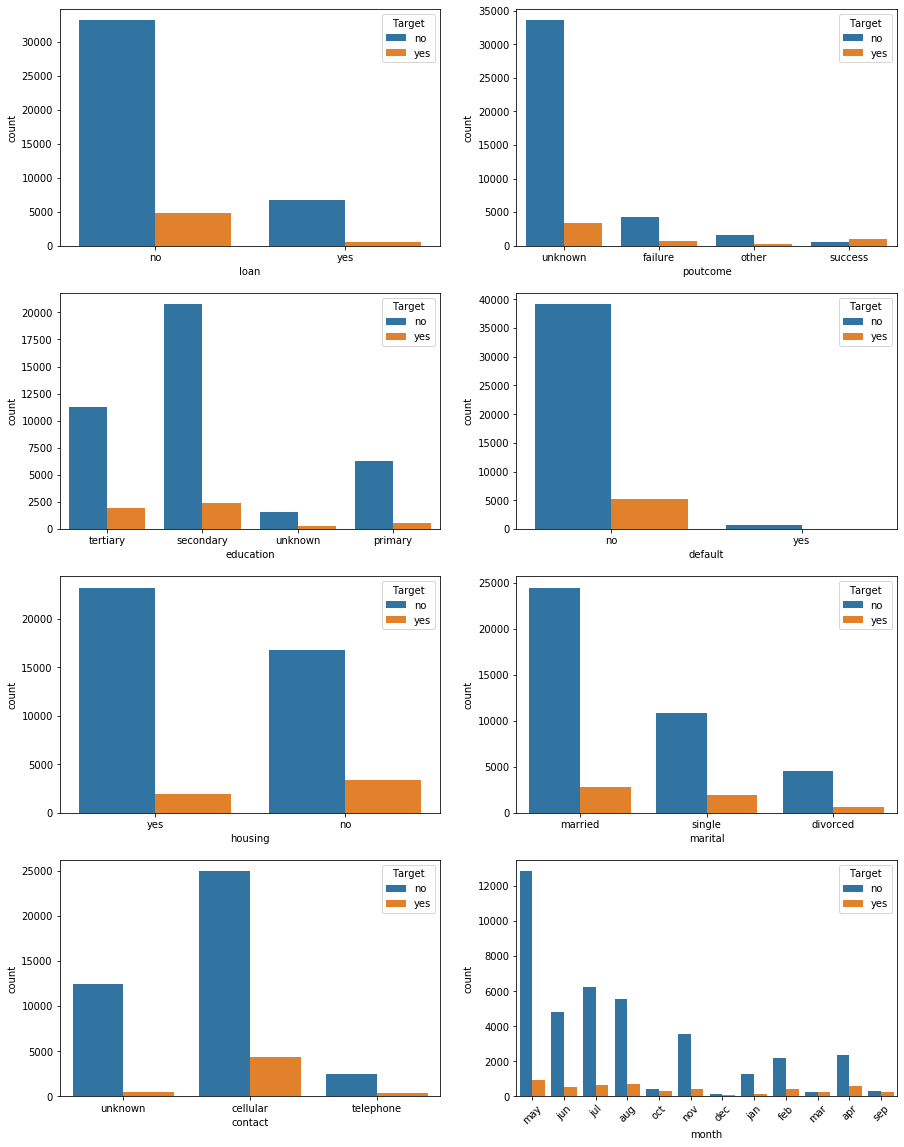

In [18]:
#looking at how each attribute having relationship with target variable, target as hue
fig, ((a,b),(c,d),(e,f),(g,h)) = plt.subplots(4,2,figsize=(15,20))
plt.xticks(rotation=45)
sns.countplot(df['loan'],hue=df['Target'],ax=a)
sns.countplot(df['poutcome'],hue=df['Target'],ax=b)
sns.countplot(df['education'],hue=df['Target'],ax=c)
sns.countplot(df['default'],hue=df['Target'],ax=d)
sns.countplot(df['housing'],hue=df['Target'],ax=e)
sns.countplot(df['marital'],hue=df['Target'],ax=f)
sns.countplot(df['contact'],hue=df['Target'],ax=g)
sns.countplot(df['month'],hue=df['Target'],ax=h)

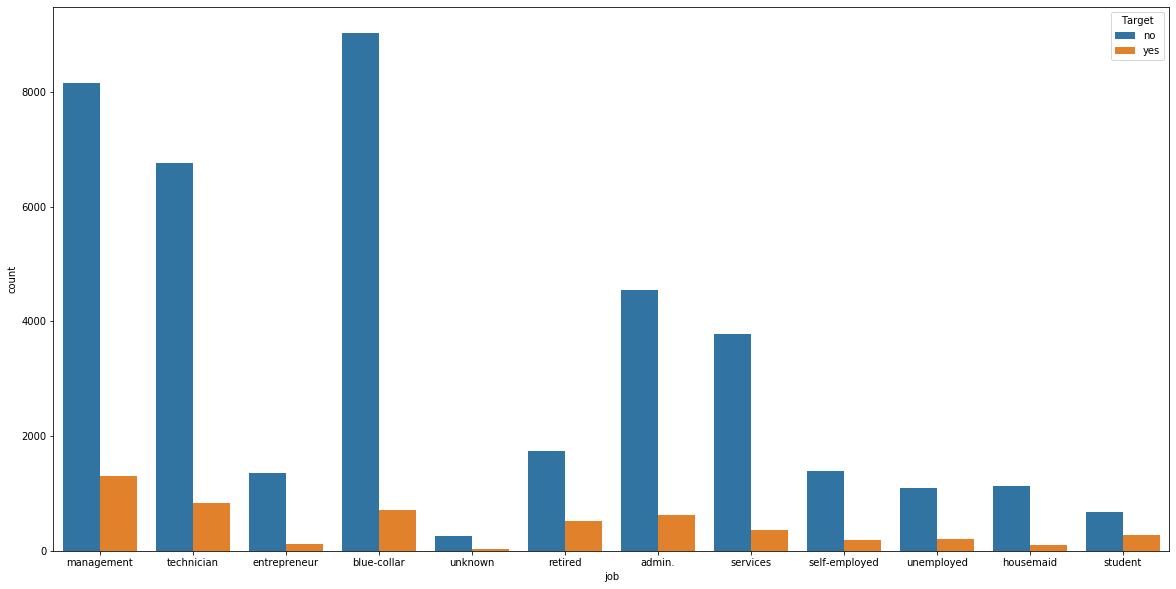

In [19]:
plt.subplots(1,1,figsize=(20,10))
sns.countplot(df['job'],hue=df['Target'])

### columns comparison with Target column : 1) Loan & Target : Less number of population subscribe when they have loans, high population didnt subscribe even they didnt have loan 2) Housing Loan & Target : More population subscribe when they didnt have housing loan 3) Marital status & Target : Married people subscribed more in compare to other 4) Education & Target : Subscription is higher when level of education is higher 5) Contact  Target : more people subscribed when contacted by Cell phone 6) Month & Target : High subscrption ration in May,June,July,Aug and Nov 7) Job and Target : Mangement level,Blue-collar jobs, Technicians and Admin level people subscribed more.

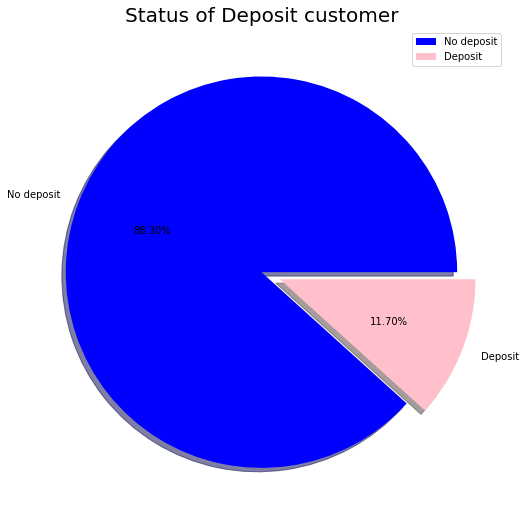

In [20]:
#lets visulaize how target coloumn distributed usig pie plot
labels = ['No deposit','Deposit']
size = df['Target'].value_counts()
colors = ['blue', 'pink']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Status of Deposit customer', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

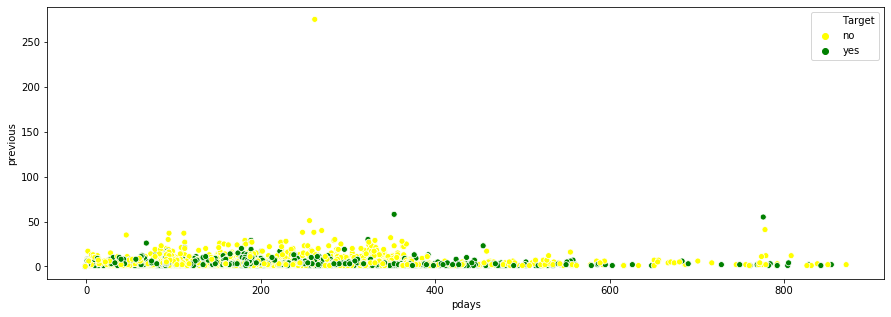

In [21]:
plt.figure(figsize=(15,5))
sns.scatterplot(df.pdays, df.previous, hue = df['Target'], palette= ['yellow','green'])


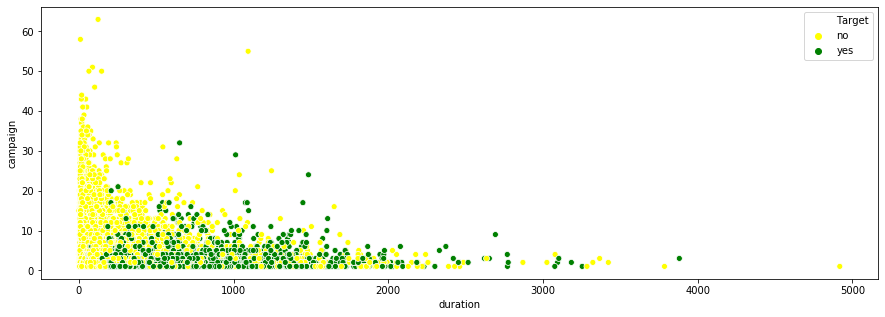

In [22]:
plt.figure(figsize=(15,5))
sns.scatterplot(df.duration, df.campaign, hue = df['Target'], palette= ['yellow','green'])

#### Call duration is less (less than 1500 seconds) people subscribed more. Call duration less than 100 seconds or less than 5 minutes people Declines usually.


### Ensure the attribute types are correct. If not, take appropriate actions.

### Get the data model ready.

### Transform the data i.e. scale / normalize if required


In [23]:
# No missing values in dataset but some values like unknown and others helplessliek missing values we will remove from dataset

# 1: Delete the rows which column 'poutcome' contains 'other'
condition = df.poutcome == 'other'
df = df.drop(df[condition].index, axis = 0, inplace = False)

In [24]:
# Step 2: Fill 'unknown' in job and education to 'other'
df[['job','education']] = df[['job','education']].replace(['unknown'],'other')

In [25]:
#drop irrelevant columns
df = df.drop(columns = ['pdays'])

In [26]:
df.shape

(43371, 16)

In [27]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,0,unknown,no
3,47,blue-collar,married,other,no,1506,yes,no,unknown,5,may,92,1,0,unknown,no
4,33,other,single,other,no,1,no,no,unknown,5,may,198,1,0,unknown,no


no     88.513062
yes    11.486938
Name: Target, dtype: float64



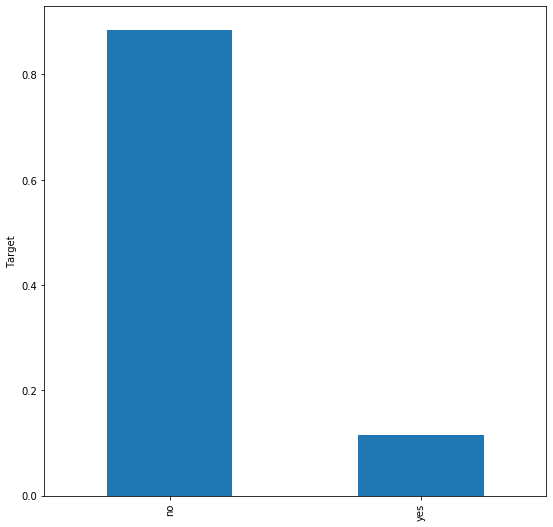

In [28]:
# Normalize
print(df['Target'].value_counts(normalize=True)*100)
print()
df['Target'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel("Target")
plt.show()

In [29]:
# Step 1: Change column name: 'target' to 'y'
df.rename(index=str, columns={'Target': 'y'}, inplace = True)

In [30]:
df.head() # now target column has cahnged to 'y'

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,0,unknown,no
3,47,blue-collar,married,other,no,1506,yes,no,unknown,5,may,92,1,0,unknown,no
4,33,other,single,other,no,1,no,no,unknown,5,may,198,1,0,unknown,no


In [31]:
#lets convert target colomns to binary 0 and 1
def convert(df, new_column, old_column):
    df[new_column] = df[old_column].apply(lambda x: 0 if x == 'no' else 1)
    return df[new_column].value_counts()

convert(df, "y", "y")

0    38389
1     4982
Name: y, dtype: int64

In [32]:
df.head() #lets have a look at connverted target cloumn 'y'

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,0,unknown,0
3,47,blue-collar,married,other,no,1506,yes,no,unknown,5,may,92,1,0,unknown,0
4,33,other,single,other,no,1,no,no,unknown,5,may,198,1,0,unknown,0


In [33]:
#One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies
dft= pd.get_dummies(df, drop_first=True)
print("Number of feautres after one-hot encoding {}".format(len(list(dft))))

Number of feautres after one-hot encoding 41


In [34]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43371 entries, 0 to 45209
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  43371 non-null  int64
 1   balance              43371 non-null  int64
 2   day                  43371 non-null  int64
 3   duration             43371 non-null  int64
 4   campaign             43371 non-null  int64
 5   previous             43371 non-null  int64
 6   y                    43371 non-null  int64
 7   job_blue-collar      43371 non-null  uint8
 8   job_entrepreneur     43371 non-null  uint8
 9   job_housemaid        43371 non-null  uint8
 10  job_management       43371 non-null  uint8
 11  job_other            43371 non-null  uint8
 12  job_retired          43371 non-null  uint8
 13  job_self-employed    43371 non-null  uint8
 14  job_services         43371 non-null  uint8
 15  job_student          43371 non-null  uint8
 16  job_technician       43371 

In [35]:
# Apply Scaling  and wll drop the target cloumn'deposit_binary' bringin to normal scale
std_scale = preprocessing.StandardScaler().fit(dft.drop('y', axis=1))
X = std_scale.transform(dft.drop('y', axis=1))
y = dft['y']

### Create the training set and test set in ratio of 70:30 Deliverable

In [36]:
#split data in to training and tests using random test function

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 30359 samples.
Testing set has 13012 samples.


### First create models using Logistic Regression and Decision Tree algorithm. Note the model performance by using different matrices. Use confusion matrix to evaluate class level metrics i.e. Precision/Recall. Also reflect the accuracy and F1 score of the model.

In [37]:
from sklearn.linear_model import LogisticRegression   # importing logistic regression from scikit learn

model = LogisticRegression(random_state=7)  #assigning a variable for the algorithm

model.fit(X_train, Y_train) #training of model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
Y_predict = model.predict(X_test)     #model is predicting y values based on test dataset given to the model

print("Trainig accuracy",model.score(X_train,Y_train))  # this will give training accuracy as training data has been used
print()
print("Testing accuracy",model.score(X_test, Y_test))   # this will give testing accuracy as testing data has been used

Trainig accuracy 0.9042458579004579

Testing accuracy 0.9050107592991086


In [39]:
#### Here the model performs about same in testing than training. 
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score

## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

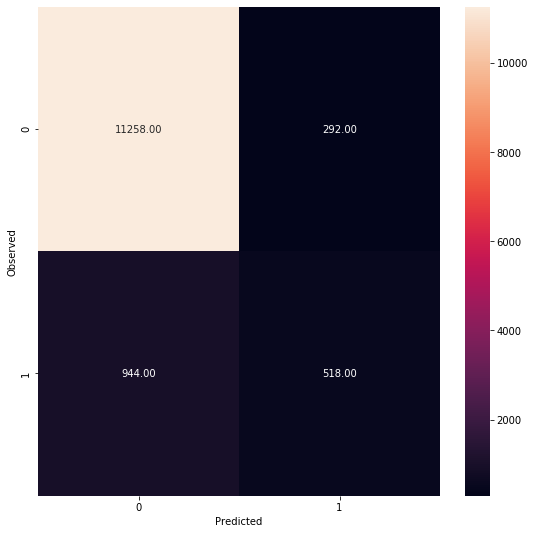

In [40]:
draw_cm(Y_test,Y_predict)

In [41]:
recall_score(Y_test,Y_predict)

0.3543091655266758

In [42]:
precision_score(Y_test,Y_predict)

0.6395061728395062

In [43]:
f1_score(Y_test,Y_predict)

0.45598591549295775

In [44]:
roc_auc_score(Y_test,Y_predict)

0.6645138901226452

In [45]:
# !pip install yellowbrick # not able to install tried
from yellowbrick.classifier import ClassificationReport, ROCAUC
# Visualize model performance with yellowbrick library
viz = ClassificationReport(model)
viz.fit(X_train, Y_train)
viz.score(X_test, Y_test)
viz.show()

roc = ROCAUC(model)
roc.fit(X_train, Y_train)
roc.score(X_test, Y_test)
roc.show()

ModuleNotFoundError: No module named 'yellowbrick'

### We can see accuracy is more than 90%

In [46]:
# Decision Tree
## Create the decision tree model using “entropy” method of finding the split columns and fit it to training data.
# invoking the decision tree classifier function. Using 'entropy' method of finding the split columns. Other option 
# could be gini index.  Restricting the depth of the tree to 5 (no particular reason for selecting this)

model_entropy=DecisionTreeClassifier(criterion='entropy')

In [47]:
model_entropy.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [48]:
#9. Print the accuracy of the model & print the confusion matrix
model_entropy.score(X_train, Y_train)  # performance on train data

1.0

In [49]:
acc_DT = model_entropy.score(X_test, Y_test)  # performance on test data


In [50]:
# import the regressor 
from sklearn.tree import DecisionTreeRegressor  
  
# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0)  
  
# fit the regressor with X and Y data 
regressor.fit(X_train, Y_train) 

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [51]:
Y_pred = regressor.predict(X_test) 

In [52]:
regressor_score = regressor.score(X_train, Y_train)

In [53]:
from sklearn.metrics import mean_squared_error, r2_score
# Have a look at R_squared to give an idea of the fit ,
# Explained variance score: 1 is perfect prediction
print('coefficient of determination R^2 of the prediction.: ',regressor_score)

coefficient of determination R^2 of the prediction.:  1.0


In [54]:
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(Y_test, Y_pred))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f'% r2_score(Y_test, Y_pred))

Mean squared error: 0.13
Test Variance score: -0.29


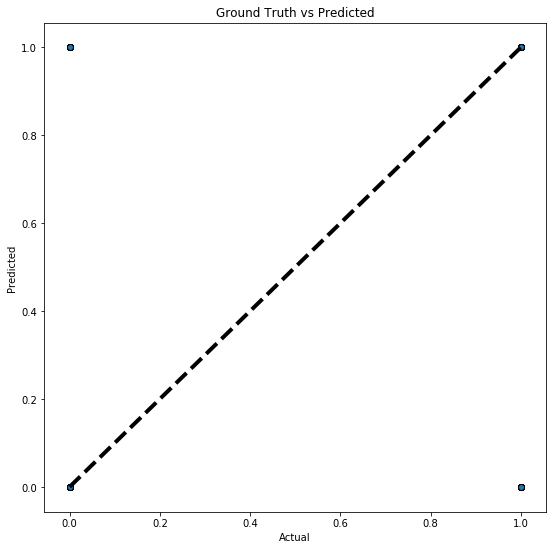

In [55]:
# So let's run the model against the test data

fig, ax = plt.subplots()
ax.scatter(Y_test, Y_pred, edgecolors=(0, 0, 0))
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

### R2 score is good but MSE very poor

In [56]:
# Regularize/prune the decision tree by limiting the max. depth of trees and print the accuracy
clf_pruned = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_pruned.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [57]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz

xvar = dataframe_tr.drop('y', axis=1)
feature_cols = xvar.columns

ModuleNotFoundError: No module named 'graphviz'

In [58]:
dot_data = StringIO()
export_graphviz(clf_pruned, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('deposit_pruned.png')
Image(graph.create_png())

NameError: name 'feature_cols' is not defined

In [59]:
preds_pruned = clf_pruned.predict(X_test)
preds_pruned_train = clf_pruned.predict(X_train)

In [60]:
print(accuracy_score(Y_test,preds_pruned))
print(accuracy_score(Y_train,preds_pruned_train))

0.9022440823854904
0.9036529529958167


In [61]:
acc_DT = accuracy_score(Y_test, preds_pruned)

### We can see above when we regularize tree test accuracy is increasing on test data for decision tree

In [62]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
g_pred = gaussian.predict(X_test)
score_gaussian = gaussian.score(X_test,Y_test)
print('The accuracy of Gaussian Naive Bayes is', score_gaussian)


The accuracy of Gaussian Naive Bayes is 0.8635106055948355


In [63]:
recall_score(Y_test,Y_predict)

0.3543091655266758

In [64]:
precision_score(Y_test,Y_predict)

0.6395061728395062

In [65]:
f1_score(Y_test,Y_predict)

0.45598591549295775

In [66]:
roc_auc_score(Y_test,Y_predict)

0.6645138901226452

In [67]:
# Support Vector Classifier (SVM/SVC)
from sklearn.svm import SVC
from sklearn import svm
svc_radical =svm.SVC(kernel='rbf',gamma='scale')
svc_radical.fit(X_train,Y_train.values.ravel())
score_svc_radical = svc_radical.score(X_test,Y_test)
svc_pred = svc_radical.predict(X_test)
print('The accuracy of Radical SVC Model is', score_svc_radical)

The accuracy of Radical SVC Model is 0.9031663080233631


### Build the ensemble models (Bagging and Boosting) and note the model performance by using different matrices. Use same metrics as in above model. (at least 3 algorithms) (15 marks)

In [68]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT})
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.902244


In [69]:
#Apply the Random forest model and print the accuracy of Random forest Model
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(X_train, Y_train)

In [70]:
pred_RF = rfcl.predict(X_test)
acc_RF = accuracy_score(Y_test, pred_RF)

In [71]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'accuracy': [acc_RF]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.902244
0,Random Forest,0.906702


In [72]:
# Applying Adaboost Ensemble Algorithm for the same data and print the accuracy
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators = 100, learning_rate=0.1, random_state=22)
abcl = abcl.fit(X_train, Y_train)

In [73]:
pred_AB =abcl.predict(X_test)
acc_AB = accuracy_score(Y_test, pred_AB)

In [74]:
tempResultsDf = pd.DataFrame({'Method':['Adaboost'], 'accuracy': [acc_AB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.902244
0,Random Forest,0.906702
0,Adaboost,0.900400


In [75]:
# Apply Bagging Classifier Algorithm and print the accuracy
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
bgcl = bgcl.fit(X_train, Y_train)

In [76]:
pred_BG = bgcl.predict(X_test)
acc_BG = accuracy_score(Y_test, pred_BG)

In [77]:
tempResultsDf = pd.DataFrame({'Method':['Bagging'], 'accuracy': [acc_BG]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.902244
0,Random Forest,0.906702
0,Adaboost,0.900400
0,Bagging,0.904319


In [78]:
# Apply GradientBoost Classifier Algorithm for the same data and print the accuracy
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22)
gbcl = gbcl.fit(X_train, Y_train)

In [79]:
pred_GB = gbcl.predict(X_test)
acc_GB = accuracy_score(Y_test, pred_GB)

In [80]:
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost'], 'accuracy': [acc_GB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.902244
0,Random Forest,0.906702
0,Adaboost,0.900400
0,Bagging,0.904319
0,Gradient Boost,0.906778


In [81]:
# For this dataset, Random forest and bagging models give the best results on test predictions
# Creating a function for visualizing classifier results
def visClassifierResults(model_w_parameters):
    viz = ClassificationReport(model_w_parameters)
    viz.fit(X_train, Y_train)
    viz.score(X_test, Y_test)
    viz.show()

    roc = ROCAUC(model_w_parameters)
    roc.fit(X_train, Y_train)
    roc.score(X_test, Y_test)
    roc.show()

In [82]:
visClassifierResults(GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22))

NameError: name 'ClassificationReport' is not defined

In [ ]:
visClassifierResults(RandomForestClassifier(n_estimators = 50))

### We can see from all different models ensemble models(adaboost,bagging,gradient boost, for decison tree random forest) are givig better performace over standard classification alogorithms models such as logistic regression ,naive bayes,support vector classifiers
### Over all Random forest model and Gradient Boost is having slightly higher accuracy compare to any model
###  As we observed dataset is imbalanced ,so lets try to over sample and observe results for few classification models in brief to see the difference